In [2]:
import numpy as np
from numpy.random import randn, rand
import scipy as sp
import scipy.signal

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerTuple
import corner
from wand.image import Image as WImage


import os
import sys
from copy import deepcopy
import time
import csv
import glob
import importlib


import emcee
import multiprocessing
import queue
from itertools import count

# import sys
# sys.path.insert(0, './pygwinc/')

import gwinc

from gwinc.noise.quantum import shotrad_debug
import lib

matplotlib.rc('font',**{'family':'serif','serif':['Times'], 'size':16})
matplotlib.rc('text', usetex=True)

267805.08121616


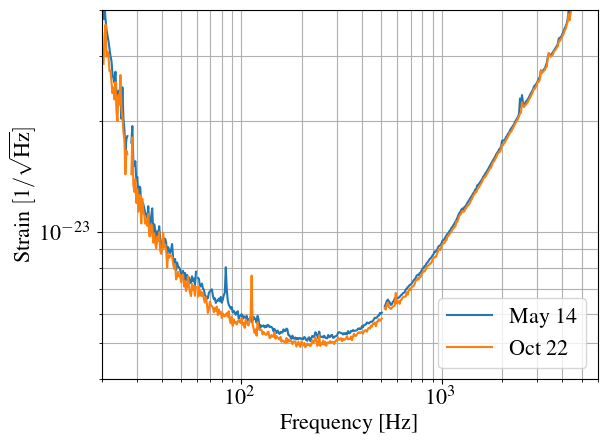

In [78]:

unsfile1 = './data/0514_all_Unsqz_FCmis_LOonCLF.h5'
fdsfile1 = './data/0514_22_FDS.h5'
unsfile2 = './data/1022_Unsqz.h5'
fdsfile2 = './data/1022_FDS.h5'


D_r1 = lib.DARM(unsfile1)
D_s1 = lib.DARM(fdsfile1)
D_r2 = lib.DARM(unsfile2)
D_s2 = lib.DARM(fdsfile2)


# freq = np.geomspace(20,2000,500)
# freq = np.geomspace(2000,6000,50)
freq = np.geomspace(20,6000,500)


D_r1.removeLines('DARM'); 
D_r1.setZeroErr(); D_r1.rebin_log(freq)
D_r2.removeLines('DARM'); 
D_r2.setZeroErr(); D_r2.rebin_log(freq)


budget = gwinc.load_budget('./L1_0514_FC7000.yaml')
ifo = budget.ifo
ifo.Laser.ArmPower = ifo.Laser.ArmPower/(1-0.02)**2
print(ifo.Laser.ArmPower)
# ifo.Optics.PhotoDetectorEfficiency = ifo.Optics.PhotoDetectorEfficiency + 0.03

ifo.Squeezer.Type = 'None'
trace = budget.run(freq=D_r1.f, ifo=ifo)
M = lib.DARM()
M.f = D_r1.f
M.S = trace.Quantum.psd


plt.loglog(D_r1.f, np.sqrt(D_r1.S), label='May 14')
plt.loglog(D_r2.f, np.sqrt(D_r2.S), label='Oct 22')
# plt.loglog(M.f, np.sqrt(M.S))
plt.xlim(20, 6000); plt.ylim(4e-24, 4e-23)

plt.xlabel('Frequency [Hz]'); plt.ylabel(r'Strain $\mathrm{[1/\sqrt{Hz}]}$')
plt.grid(True, which='both')
plt.legend()
plt.show()

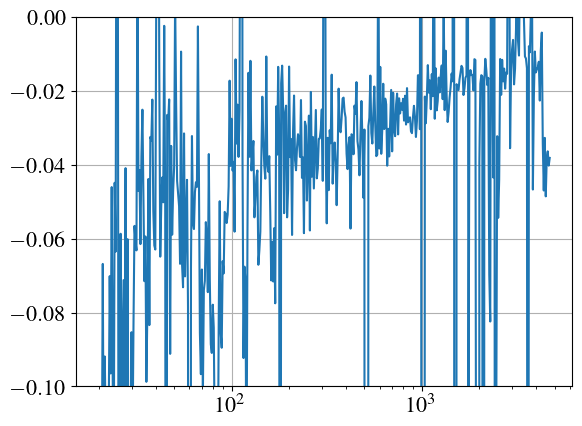

In [25]:
plt.semilogx(D_r1.f, (np.sqrt(D_r2.S)-np.sqrt(D_r1.S))/np.sqrt(D_r1.S))
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

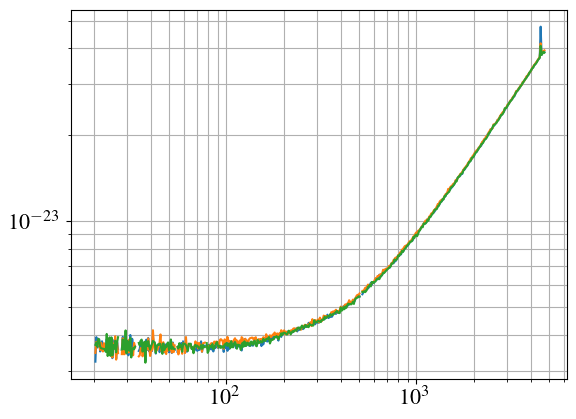

In [51]:
# shot = lib.DARM(unsfile1)
# shot.S = shot.S_null - shot.S_dark
# shot.setZeroErr()
# shot.removeLines('DARM'); shot.removeLines('CAL'); shot.rebin_log(freq)
# shot_r1 = deepcopy(shot)

shot = lib.DARM(unsfile2)
shot.S = shot.S_null - shot.S_dark
shot.setZeroErr()
shot.removeLines('DARM'); shot.removeLines('CAL'); shot.rebin_log(freq)
shot_r2 = deepcopy(shot)


shot = lib.DARM(fdsfile1)
shot.S = shot.S_null - shot.S_dark
shot.setZeroErr()
shot.removeLines('DARM'); shot.removeLines('CAL'); shot.rebin_log(freq)
shot_s1 = deepcopy(shot)

# shot = lib.DARM(fdsfile2)
# shot.S = shot.S_null - shot.S_dark
# shot.setZeroErr()
# shot.removeLines('DARM'); shot.removeLines('CAL'); shot.rebin_log(freq)
# shot_s2 = deepcopy(shot)



budget = gwinc.load_budget('./L1_0514_FC7000.yaml')
ifo = budget.ifo
# ifo.Laser.ArmPower = ifo.Laser.ArmPower/(1-0.02)**2

ifo.Squeezer.Type = 'None'
trace = budget.run(freq=freq, ifo=ifo)
S_shot1 = trace.Quantum.RelASSqz.psd + trace.Quantum.MM.psd + trace.Quantum.Readout.psd

ifo.Laser.ArmPower = ifo.Laser.ArmPower/(1-0.02)**2
trace = budget.run(freq=freq, ifo=ifo)
S_shot2 = trace.Quantum.RelASSqz.psd + trace.Quantum.MM.psd + trace.Quantum.Readout.psd

# ifo.Optics.PhotoDetectorEfficiency = ifo.Optics.PhotoDetectorEfficiency + 0.03
# trace = budget.run(freq=freq, ifo=ifo)
# S_shot2 = trace.Quantum.RelASSqz.psd + trace.Quantum.MM.psd + trace.Quantum.Readout.psd

# plt.loglog(shot_r1.f, np.sqrt(shot_r1.S))
plt.loglog(shot_r2.f, np.sqrt(shot_r2.S))
plt.loglog(shot_s1.f, np.sqrt(shot_s1.S))
plt.loglog(shot_s2.f, np.sqrt(shot_s2.S))
# plt.loglog(freq, np.sqrt(S_shot1))
# plt.loglog(freq, np.sqrt(S_shot2))
plt.grid(True, which='both')
plt.show()

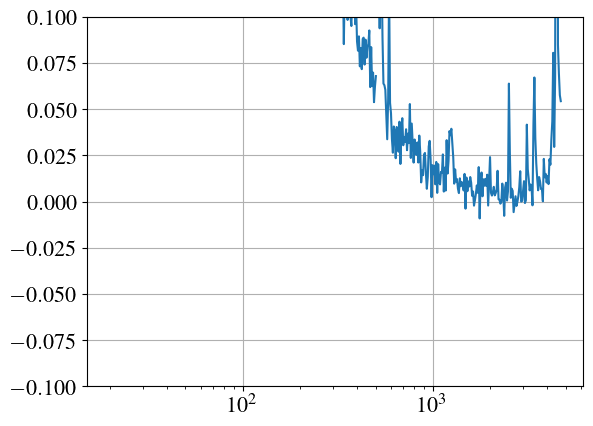

In [49]:
# plt.semilogx(shot_s1.f, (np.sqrt(shot_s2.S)-np.sqrt(shot_s1.S))/np.sqrt(shot_s1.S))
plt.semilogx(freq, (np.sqrt(D_r2.S)-np.sqrt(shot_r2.S))/np.sqrt(shot_r2.S))
plt.grid()
plt.ylim(-0.1, 0.1)
plt.show()

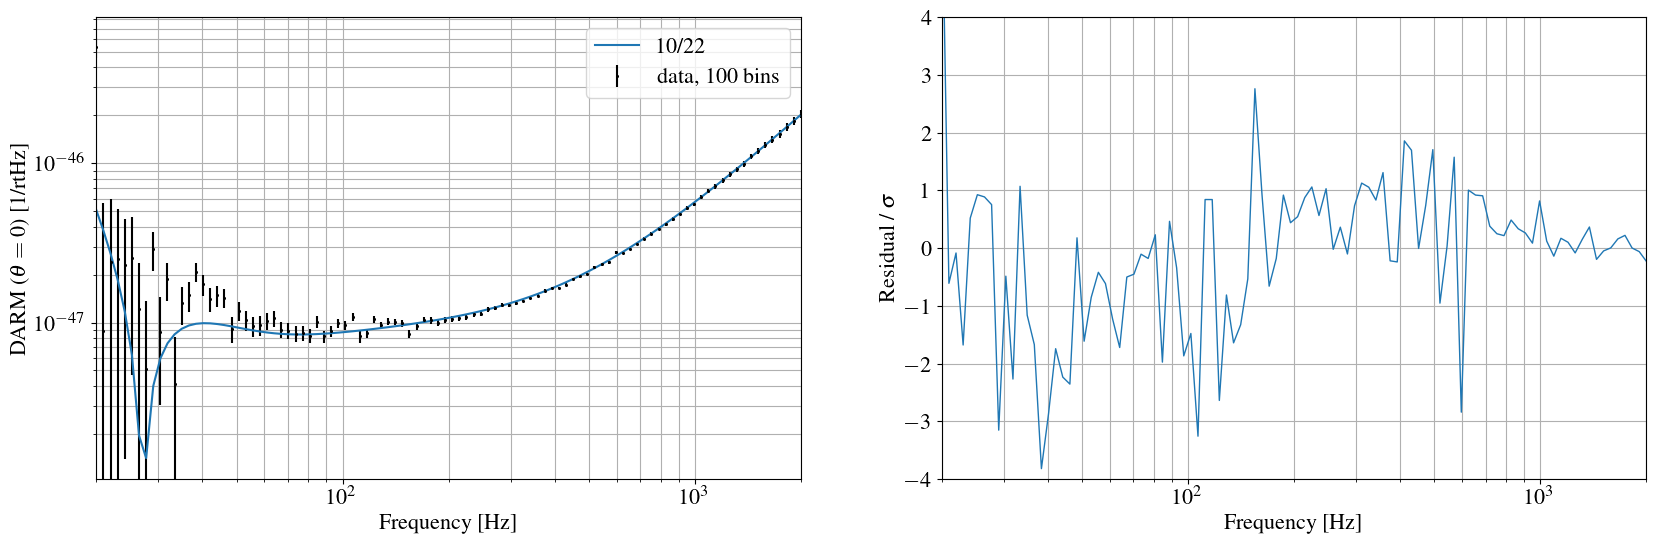

{'Laser.ArmPower': (267.517333984375, -3.305511474609375, 4.088714599609375),
 'Optics.PhotoDetectorEfficiency': (7.51124906539917,
  -0.8220887184143066,
  1.120272159576416),
 'Optics.MM_IFO_OMC': (5.706505537033081,
  -0.8562748432159424,
  0.9750430583953857),
 'Optics.MM_IFO_OMCphi': (-72.60003662109375,
  -15.253265380859375,
  18.72046661376953),
 'Squeezer.AmplitudedB': (11.49777603149414,
  -0.48521102905273494,
  0.5580558776855469),
 'Squeezer.SQZAngle': (7.1311564445495605,
  -0.4723834991455078,
  1.362093448638916),
 'Squeezer.MM_SQZ_OMC': (3.607351064682007,
  -0.8554423904418944,
  2.92828631401062),
 'Squeezer.FilterCavity.fdetune': (-24.68744945526123,
  -0.8475867843627931,
  0.5294809341430664),
 'Squeezer.FilterCavity.L_mm': (2.128257989883423,
  -0.6802414655685425,
  0.9175524711608887),
 'Squeezer.FilterCavity.psi_mm': (-131.54647827148438,
  -17.119958496093744,
  324.06138366699224)}

In [91]:
import lib, importlib; importlib.reload(lib)

def init(budget):
    ifo = budget.ifo
    # ifo.Optics.ITM.Transmittance = 0.0148
    # ifo.Optics.ETM.Transmittance = 5e-6
    # ifo.Optics.Quadrature.dc = np.pi / 180 * (90-11) # theta_LO
    ifo.Laser.ArmPower = 269e3; 
    if hasattr(ifo.Laser, 'Power'):
        del ifo.Laser.Power
    ifo.Optics.PhotoDetectorEfficiency = 0.92 # 1 - (0.025 + 0.01 + 800e-6 + 0.015 + 0.007 + 0.02)
    ifo.Optics.MM_IFO_OMC = 0.0554
    ifo.Optics.MM_IFO_OMCphi = -51 *np.pi/180

    # ifo.Optics.SRM.SRCGouy_rad = 43 *np.pi/180
    # ifo.Optics.SRM.Tunephase = 0.14 *np.pi/180 # SRCL_detuning
    # ifo.Optics.BSLoss = 500e-6
    # ifo.Optics.is_OPD = False # default is False
    # ifo.Optics.MM_ARM_SRC = 10**(-31.46/20)
    # ifo.Optics.MM_ARM_SRCphi = 0 *np.pi/180

    ifo.Squeezer.Type = 'Freq Independent'
    ifo.Squeezer.AmplitudedB = 12.2 # z_eff_dB
    # ifo.Squeezer.SQZAngleRMS = 27e-3; # 28.4 [rad]
    # ifo.Squeezer.InjectionLoss = 0.071; # [-]
    # ifo.Squeezer.direct_mm_sqz_ifo = False; # whether MM_SQZ_OMC is SQZ2OMC (False, default) or SQZ2IFO (True)
    ifo.Squeezer.MM_SQZ_OMC = 0.055; # mode-mismatch between squeezer to IFO or OMC
    # ifo.Squeezer.MM_SQZ_OMCphi = -45 *np.pi/180; # mismatch phasing
    ifo.Squeezer.SQZAngle = 7.6*np.pi/180; # 12.3 is sqz corresponding to -11 deg LO angle, 0.14 deg SRCL detuning, and -31 dB MM_SR
    
    ifo.Squeezer.FilterCavity.fdetune = -25.3; # [Hz], FC detuning
    # ifo.Squeezer.FilterCavity.Lrt = 52e-6; # [-], FC RTL
    # ifo.Squeezer.FilterCavity.Ti = 919.25e-6; # [-] FC1 power Transmission
    # ifo.Squeezer.FilterCavity.L_mm = 0.025; # [-], mode-mismatch from OPO to FC
    # ifo.Squeezer.FilterCavity.psi_mm = 0; # [rad], mismatch phasing
    # ifo.Squeezer.FilterCavity.Gouy_rad = -109*np.pi/180; # [rad], FC Gouy phase
    # ifo.Squeezer.FilterCavity.Lrms = 0.25e-12; # [m], FC RMS motion
    



# folder3 = './fig/FDS/MCMC/DARMdiff/oct22/'
# import fig.FDS.MCMC.DARMdiff.oct22.MCMC_FDS as mcmc3
# importlib.reload(mcmc3)
# key3 = [
#         'Laser.ArmPower',
#         'Optics.PhotoDetectorEfficiency', 
#         'Optics.MM_IFO_OMC',
#         'Optics.MM_IFO_OMCphi',
#         'Squeezer.AmplitudedB',
#         'Squeezer.SQZAngle',
#         'Squeezer.MM_SQZ_OMC',
#         'Squeezer.FilterCavity.fdetune'
# ]
# freq3 = np.geomspace(20,2000,100)
# label3 = r'10/22'



folder3 = './fig/FDS/MCMC/DARMdiff/oct22_2/'
import fig.FDS.MCMC.DARMdiff.oct22_2.MCMC_FDS as mcmc3
importlib.reload(mcmc3)
key3 = [
        'Laser.ArmPower',
        'Optics.PhotoDetectorEfficiency', 
        'Optics.MM_IFO_OMC',
        'Optics.MM_IFO_OMCphi',
        'Squeezer.AmplitudedB',
        'Squeezer.SQZAngle',
        'Squeezer.MM_SQZ_OMC',
        'Squeezer.FilterCavity.fdetune',
        'Squeezer.FilterCavity.L_mm',
        'Squeezer.FilterCavity.psi_mm',
]
freq3 = np.geomspace(20,2000,100)
label3 = r'10/22'




filelist = [
    # ('0514_0_FDS', '0514_1_Unsqz_FCmis_LOonCLF', 0),
    # ('0514_21_FDS', '0514_20_Unsqz_FCmis_LOonCLF', 0),
    # ('0514_22_FDS', '0514_all_Unsqz_FCmis_LOonCLF', 0),
    # ('0515_01_FDS', '0515_5_Unsqz_FCmis_LOfinalized', 0),
    # ('0515_02_FDS', '0515_5_Unsqz_FCmis_LOfinalized',  0),
    # ('0515_03_FDS', '0515_5_Unsqz_FCmis_LOfinalized',  0),
    # ('0515_04_FDS', '0515_5_Unsqz_FCmis_LOfinalized',  0),
    # ('0515_3_FDS', '0515_5_Unsqz_FCmis_LOfinalized',  0),
    # ('0523_1_FDS', '0523_8_Unsqz_FConRLFCLF_LOengaged', 0),
    # ('0523_7_FDS_angle3', '0523_8_Unsqz_FConRLFCLF_LOengaged', -12),
    # ('0523_6_FDS_angle2', '0523_8_Unsqz_FConRLFCLF_LOengaged', -5),
    # ('0523_10-13_FDS', '0523_9_Unsqz_FConRLFCLF_LOengaged_PRX', 0),
    # ('0523_5_FDS_angle1', '0523_8_Unsqz_FConRLFCLF_LOengaged', 12),
    # ('0523_11_FDS', '0523_9_Unsqz_FConRLFCLF_LOengaged_PRX', 0),
    # ('0523_12_FDS', '0523_9_Unsqz_FConRLFCLF_LOengaged_PRX', 0),
    # ('0523_13_FDS', '0523_9_Unsqz_FConRLFCLF_LOengaged_PRX', 0),
    ('1022_FDS', '1022_Unsqz', 0),
]

budget = gwinc.load_budget('Aplus')


result = []; result_n = []; result_p = []; likelihood = []; likelihood_l = [];
i = 0
for file in filelist:
    fdsfile = file[0]
    unsfile = file[1]
    sqzAngle = file[2]
    nburn = 2000
    
    
    
    plt.subplot(len(filelist), 2, 2*i+1)
    chain = np.load(folder3 + str(fdsfile) + '.npy')
    [nwalkers, nsteps, ndim] = chain.shape
    samples = chain[:, nburn:, :].reshape((-1, ndim))
    
    budget = gwinc.load_budget('L1_1022_FC7000.yaml')
    
    ifo = budget.ifo
    mdl = mcmc3.model(np.median(samples, axis=0), freq3, budget, key3)
    
    # init(budget)
    # ifo.Squeezer.SQZAngle = 12*np.pi/180;
    # ifo.Squeezer.AmplitudedB = 12.2 # z_eff_dB
    # ifo.Squeezer.Type = 'None'
    # trace = budget.run(freq=freq3, ifo=ifo)
    # S_uns = trace.Quantum.psd
    # S_shot = trace.Quantum.RelASSqz.psd + trace.Quantum.MM.psd + trace.Quantum.Readout.psd
    # ifo.Squeezer.Type = 'Freq Dependent'
    # trace = budget.run(freq=freq3, ifo=ifo)
    # S_fds = trace.Quantum.psd
    # S_diff = S_fds - S_uns
    # mdl = S_diff
    
    
    
    [data, relerr] = mcmc3.getdata(freq3, file)
    mid = int(len(data)/2)
    plt.errorbar(freq3, abs(data[:mid]), abs(data[:mid])*[relerr[:mid], relerr[:mid]], marker='*', ms=1.75, color='black',
                 ls='-', lw=0, elinewidth=1.5, label='data, 100 bins')
    # plt.errorbar(freq3, abs(data[mid:]), abs(data[mid:])*[relerr[mid:], relerr[mid:]], marker='*', ms=1.75, color='black',
    #              ls='-', lw=0, elinewidth=1.5, label='data, 100 bins')
    plt.loglog(freq3, abs(mdl[:mid]), label=label3)
    plt.subplot(len(filelist), 2, 2*i+2)
    plt.semilogx(freq3, (data[:mid]-mdl[:mid])/abs(data[:mid]*relerr[:mid]), 'o-', ms=0, lw=1, label=label3)
    
    
    plt.subplot(len(filelist), 2, 2*i+1)
    plt.xscale('log'); plt.yscale('log')
    plt.xlim(20, 2000); 
    # plt.ylim(1e-24, 3e-23)
    # plt.xlim(2000, 3000); plt.ylim(2e-23, 3e-23)
    # plt.xlabel('Frequency [Hz]'); 
    plt.ylabel(r'DARM ($\theta = ' + str(sqzAngle) + '$) [1/rtHz]')
    # plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.legend()
    plt.grid(which='both')
    
    
    plt.subplot(len(filelist), 2, 2*i+2)
    # plt.semilogx(freq, data-mdl)
    # plt.xscale('log'); plt.yscale('log')
    plt.xlim(20, 2000); 
    # plt.ylabel('Residual [$\sigma$]')
    plt.ylabel('Residual / $\sigma$')
    plt.ylim(-4, 4)
    # plt.xlim(2000, 3000); plt.ylim(2e-23, 3e-23)
    # plt.xlabel('Frequency [Hz]'); 
    # plt.ylabel(r'Relative residual [%]')
    # plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    # plt.legend()
    plt.grid(which='both')
    
    
    i += 1
    
i -= 1
plt.subplot(len(filelist), 2, 2*i+1)
plt.xlabel('Frequency [Hz]')
plt.subplot(len(filelist), 2, 2*i+2)
plt.xlabel('Frequency [Hz]')

fig = plt.gcf()
fig.set_size_inches(20,6)
# fig.set_size_inches(14,18)
# fig.set_size_inches(14,50)
# fig.suptitle(title, y=0.95, fontsize=10)
# plt.savefig('./result.pdf')
plt.show()



samples = mcmc3.convertUnit(samples, key3)
median = np.percentile(samples, 50, axis=0)
medn1 = np.percentile(samples, 16, axis=0)
medp1 = np.percentile(samples, 84, axis=0)

result = {key3[i]: (median[i], medn1[i]-median[i], medp1[i]-median[i]) for i in range(len(key3))}
result

In [86]:
modelerrfile = './fig/FIS/MCMC/all/FitmmPsiOMC/deltaM.npy'
# unsfile = './data/0514_all_Unsqz_FCmis_LOonCLF.h5'
# fdsfile = './data/0514_22_FDS.h5'
# unsfile = './data/0515_5_Unsqz_FCmis_LOfinalized.h5'
# fdsfile = './data/0515_3_FDS.h5'
unsfile = './data/1022_Unsqz.h5'
fdsfile = './data/1022_FDS.h5'






D_r = lib.DARM(unsfile)
D_s = lib.DARM(fdsfile)


# M = np.load('./fig/FIS/MCMC/all/FitmmPsiOMC/S_med.npy')
# budget = gwinc.load_budget('Aplus')
# init(budget)
budgetyaml = './L1_1022_FC7000.yaml'
budget = gwinc.load_budget(budgetyaml)
ifo = budget.ifo
ifo.Squeezer.Type = 'None'
trace = budget.run(freq=D_r.f, ifo=ifo)
M = lib.DARM()
M.f = D_r.f
M.S = trace.Quantum.psd


# plt.loglog(D_r.f, np.sqrt(D_r.S))
# plt.loglog(D_s.f, np.sqrt(D_s.S))
# plt.loglog(D_r.f, np.sqrt(M))
# plt.xlim(20,2000)
# plt.ylim(2e-24, 2e-23)
# plt.show()

C = D_r - M
# C.S = abs(C.S)
Q = D_s - C

# freq = np.arange(20,2000,1)
freq = np.geomspace(20,2000,100)

# Snosqz = np.load('./fig/FIS/MCMC/all/FitmmPsiOMC/S_med.npy')



# ### Oct.22 data doesn't have stationarity available ###
# D_s.relerrN_n = D_s.relerrD_n
# D_s.relerrN_p = D_s.relerrD_p
# D_r.relerrN_n = D_s.relerrD_n
# D_r.relerrN_p = D_s.relerrD_p





Q.err_n = np.sqrt((D_s.S*D_s.relerrD_n)**2 + (D_r.S*D_r.relerrD_n)**2 + (C.S*D_r.relerrN_n)**2)
Q.err_p = np.sqrt((D_s.S*D_s.relerrD_p)**2 + (D_r.S*D_r.relerrD_p)**2 + (C.S*D_r.relerrN_p)**2)
Q.removeLines('DARM'); Q.rebin_log(freq)


freq = np.geomspace(20,1000,500)

D_r.relerr_n = D_r.relerrD_n; D_r.relerr_p = D_r.relerrD_p
D_r.calcErr(); # D_r.removeLines('DARM'); 
D_r.rebin_log(freq)

D_s.relerr_n = D_s.relerrD_n; D_s.relerr_p = D_s.relerrD_p
D_s.calcErr(); # D_s.removeLines('DARM'); 
D_s.rebin_log(freq)

C.relerr_n = D_s.relerrN_n; C.relerr_p = D_s.relerrN_p
C.calcErr(); # C.removeLines('DARM'); 
C.rebin_log(freq)

# M.setZeroErr(); M.calcErr(); M.removeLines('DARM'); M.rebin_log(freq)
(relerrM_n, relerrM_p) = np.load(modelerrfile)
relerrM_n = np.interp(Q.f, np.geomspace(20,2000,100), relerrM_n)
relerrM_p = np.interp(Q.f, np.geomspace(20,2000,100), relerrM_p)


trace = budget.run(freq=Q.f, ifo=ifo)
M = lib.DARM()
M.f = Q.f
M.S = trace.Quantum.psd

Q.err_n = np.sqrt(Q.err_n**2 + (Q.S*np.interp(Q.f, D_s.f_lin, D_s.relerrG_n))**2 + (M.S*relerrM_n)**2)
Q.err_p = np.sqrt(Q.err_p**2 + (Q.S*np.interp(Q.f, D_s.f_lin, D_s.relerrG_p))**2 + (M.S*relerrM_p)**2)

# plt.semilogx(freq, Q.err_n/Q.S)
# plt.semilogx(freq, np.sqrt(D_s.err_n**2 + D_r.err_n**2 + C.err_n**2 + (Q.S*np.interp(freq, fds.f, fds.relerrG_n))**2 + (Q.S*relerrM_n)**2)/Q.S)
# plt.show()



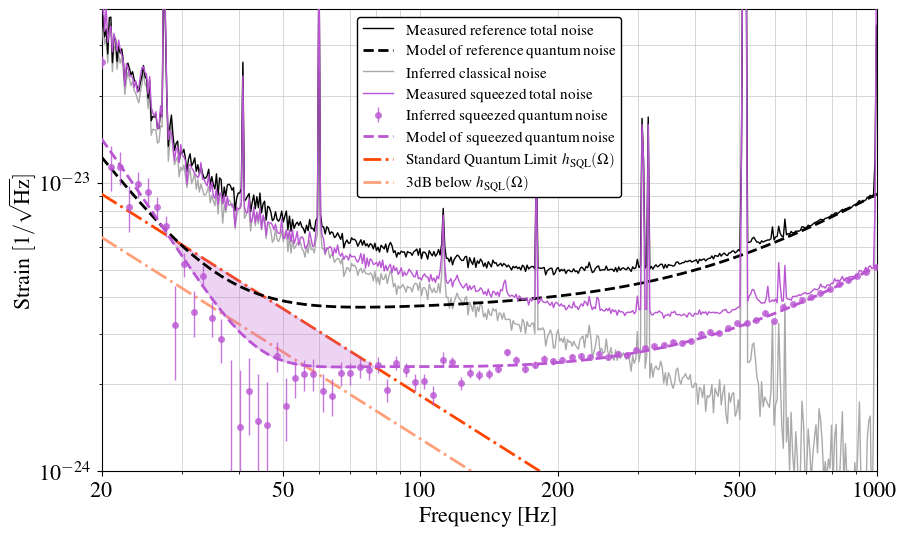

In [87]:
fontscale = 1.0
matplotlib.rc('font',**{'family':'serif','serif':['Times'], 'size':16*fontscale})

PRXcolor = np.array([173,3,222])/255
# sqzcolor = PRXcolor
sqzcolor = 'mediumorchid'
# sqlcolor = np.array([200,10,10])/255
# sqlcolor2 = np.array([242,158,142])/255
sqlcolor = 'orangered'
sqlcolor2 = 'lightsalmon'

fig, ax = plt.subplots()

ax.errorbar(Q.f, np.sqrt(abs(Q.S)), [Q.err_n, Q.err_p]/(2*np.sqrt(abs(Q.S))), ecolor=sqzcolor, marker='o', markerfacecolor=sqzcolor, alpha=0.8,
             ms=5,ls='-',lw=0,c=sqzcolor, elinewidth=1,capsize=0,mew=0,zorder=20,label='Inferred squeezed quantum noise')


SQL = np.sqrt(8*scipy.constants.hbar/40/(2*np.pi*Q.f)**2)

budget = gwinc.load_budget(budgetyaml)
ifo = budget.ifo
# ifo.Squeezer.SQZAngle = (0.7+ifo.Squeezer.SQZAngle*180/np.pi)*np.pi/180

trace = budget.run(freq=Q.f)
S_fds = trace.Quantum.psd

ax.loglog(Q.f, np.sqrt(S_fds),c=sqzcolor,linestyle='--',label = 'Model of squeezed quantum noise',linewidth = 2.0,zorder=20)

ax.fill_between(Q.f, np.sqrt(S_fds), SQL/4000, where = np.sqrt(S_fds)<SQL/4000, alpha = 0.25, interpolate=True, color=ax.lines[-1].get_color(), zorder=10)
# ax.loglog(freq, np.sqrt(C.S),c=[100/255,100/255,100/255],label = 'Subtraction',linewidth = 0.7,zorder=10)
ax.loglog(D_r.f, np.sqrt(D_r.S),c='black',label = 'Measured reference total noise',linewidth = 1,zorder=10)
ax.loglog(D_s.f, np.sqrt(D_s.S),c=sqzcolor,label = 'Measured squeezed total noise',linewidth = 1,zorder=15)
ax.loglog(M.f, np.sqrt(M.S),c = 'black', linestyle='--', lw = 2.0,label='Model of reference quantum noise',zorder=10)

grayrgb = 170
ax.loglog(C.f, np.sqrt(abs(C.S)),c = [grayrgb/255,grayrgb/255,grayrgb/255], lw = 1,label='Inferred classical noise', zorder = 5)


ax.loglog(Q.f, SQL/4000, c=sqlcolor,label='Standard Quantum Limit $h_{\mathrm{SQL}}(\Omega)$',linestyle='-.',linewidth = 2.0, zorder = 5)
ax.loglog(Q.f, SQL/4000/10**(3/20), c=sqlcolor2,label='3dB below $h_{\mathrm{SQL}}(\Omega)$',linestyle='-.',linewidth = 2.0, zorder = 5)

ax.set_xticks([20,50,100,200,500,1000,2000], ('20','50','100','200','500','1000','2000'))
ax.set_xlim(20, 1000); ax.set_ylim(1e-24, 4e-23)

grayrgb = 200
ax.grid(True, which='both', color=[grayrgb/255,grayrgb/255,grayrgb/255], linestyle='-', linewidth=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,3,4,2,7,0,5,6]
legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], edgecolor="black", fontsize=11*fontscale)

# legend = ax.legend(edgecolor="black", fontsize=10)
legend.set_zorder(100)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor('white')

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Strain $\mathrm{[1/\sqrt{Hz}]}$')
# ax.set_title(fdsfile)

fig.set_size_inches(10, 6)

# plt.savefig('./fig/moneyplot.svg')
# plt.savefig('./fig/moneyplot.pdf')
plt.show()

In [84]:
modelerrfile = './fig/FIS/MCMC/all/FitmmPsiOMC/deltaM.npy'
# unsfile = './data/0514_all_Unsqz_FCmis_LOonCLF.h5'
# fdsfile = './data/0514_22_FDS.h5'
# unsfile = './data/0515_5_Unsqz_FCmis_LOfinalized.h5'
# fdsfile = './data/0515_3_FDS.h5'
unsfile = './data/1022_Unsqz.h5'
fdsfile = './data/1022_FDS.h5'






D_r = lib.DARM(unsfile)
D_s = lib.DARM(fdsfile)


# M = np.load('./fig/FIS/MCMC/all/FitmmPsiOMC/S_med.npy')
# budget = gwinc.load_budget('Aplus')
# init(budget)
budgetyaml = './L1_1022_FC7000_2.yaml'
budget = gwinc.load_budget(budgetyaml)
ifo = budget.ifo
ifo.Squeezer.Type = 'None'
trace = budget.run(freq=D_r.f, ifo=ifo)
M = lib.DARM()
M.f = D_r.f
M.S = trace.Quantum.psd


# plt.loglog(D_r.f, np.sqrt(D_r.S))
# plt.loglog(D_s.f, np.sqrt(D_s.S))
# plt.loglog(D_r.f, np.sqrt(M))
# plt.xlim(20,2000)
# plt.ylim(2e-24, 2e-23)
# plt.show()

C = D_r - M
# C.S = abs(C.S)
Q = D_s - C

# freq = np.arange(20,2000,1)
freq = np.geomspace(20,2000,100)

# Snosqz = np.load('./fig/FIS/MCMC/all/FitmmPsiOMC/S_med.npy')



# ### Oct.22 data doesn't have stationarity available ###
# D_s.relerrN_n = D_s.relerrD_n
# D_s.relerrN_p = D_s.relerrD_p
# D_r.relerrN_n = D_s.relerrD_n
# D_r.relerrN_p = D_s.relerrD_p





Q.err_n = np.sqrt((D_s.S*D_s.relerrD_n)**2 + (D_r.S*D_r.relerrD_n)**2 + (C.S*D_r.relerrN_n)**2)
Q.err_p = np.sqrt((D_s.S*D_s.relerrD_p)**2 + (D_r.S*D_r.relerrD_p)**2 + (C.S*D_r.relerrN_p)**2)
Q.removeLines('DARM'); Q.rebin_log(freq)


freq = np.geomspace(20,6000,500)

D_r.relerr_n = D_r.relerrD_n; D_r.relerr_p = D_r.relerrD_p
D_r.calcErr(); # D_r.removeLines('DARM'); 
D_r.rebin_log(freq)

D_s.relerr_n = D_s.relerrD_n; D_s.relerr_p = D_s.relerrD_p
D_s.calcErr(); # D_s.removeLines('DARM'); 
D_s.rebin_log(freq)

C.relerr_n = D_s.relerrN_n; C.relerr_p = D_s.relerrN_p
C.calcErr(); # C.removeLines('DARM'); 
C.rebin_log(freq)

# M.setZeroErr(); M.calcErr(); M.removeLines('DARM'); M.rebin_log(freq)
(relerrM_n, relerrM_p) = np.load(modelerrfile)
relerrM_n = np.interp(Q.f, np.geomspace(20,2000,100), relerrM_n)
relerrM_p = np.interp(Q.f, np.geomspace(20,2000,100), relerrM_p)


trace = budget.run(freq=Q.f, ifo=ifo)
M = lib.DARM()
M.f = Q.f
M.S = trace.Quantum.psd

Q.err_n = np.sqrt(Q.err_n**2 + (Q.S*np.interp(Q.f, D_s.f_lin, D_s.relerrG_n))**2 + (M.S*relerrM_n)**2)
Q.err_p = np.sqrt(Q.err_p**2 + (Q.S*np.interp(Q.f, D_s.f_lin, D_s.relerrG_p))**2 + (M.S*relerrM_p)**2)

# plt.semilogx(freq, Q.err_n/Q.S)
# plt.semilogx(freq, np.sqrt(D_s.err_n**2 + D_r.err_n**2 + C.err_n**2 + (Q.S*np.interp(freq, fds.f, fds.relerrG_n))**2 + (Q.S*relerrM_n)**2)/Q.S)
# plt.show()



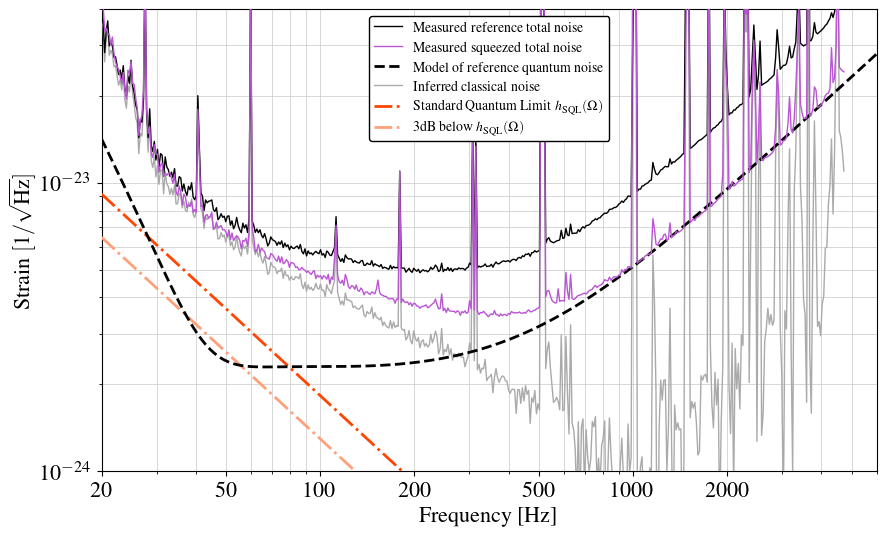

In [85]:
fontscale = 1.0
matplotlib.rc('font',**{'family':'serif','serif':['Times'], 'size':16*fontscale})

PRXcolor = np.array([173,3,222])/255
# sqzcolor = PRXcolor
sqzcolor = 'mediumorchid'
# sqlcolor = np.array([200,10,10])/255
# sqlcolor2 = np.array([242,158,142])/255
sqlcolor = 'orangered'
sqlcolor2 = 'lightsalmon'

fig, ax = plt.subplots()


SQL = np.sqrt(8*scipy.constants.hbar/40/(2*np.pi*Q.f)**2)

budget = gwinc.load_budget(budgetyaml)
ifo = budget.ifo

# ifo.Squeezer.Type = 'None'
# trace = budget.run(freq=C.f)
# S_nosqz = trace.Quantum.psd

ifo.Squeezer.Type = 'Freq Dependent'
# ifo.Squeezer.SQZAngle = (0.7+ifo.Squeezer.SQZAngle*180/np.pi)*np.pi/180
trace = budget.run(freq=C.f)
S_fds = trace.Quantum.psd

# ax.loglog(freq, np.sqrt(C.S),c=[100/255,100/255,100/255],label = 'Subtraction',linewidth = 0.7,zorder=10)
ax.loglog(D_r.f, np.sqrt(D_r.S),c='black',label = 'Measured reference total noise',linewidth = 1,zorder=10)
ax.loglog(D_s.f, np.sqrt(D_s.S),c=sqzcolor,label = 'Measured squeezed total noise',linewidth = 1,zorder=15)
ax.loglog(freq, np.sqrt(S_fds),c = 'black', linestyle='--', lw = 2.0,label='Model of reference quantum noise',zorder=10)

grayrgb = 170
ax.loglog(C.f, np.sqrt(abs(C.S)),c = [grayrgb/255,grayrgb/255,grayrgb/255], lw = 1,label='Inferred classical noise', zorder = 5)


ax.loglog(Q.f, SQL/4000, c=sqlcolor,label='Standard Quantum Limit $h_{\mathrm{SQL}}(\Omega)$',linestyle='-.',linewidth = 2.0, zorder = 5)
ax.loglog(Q.f, SQL/4000/10**(3/20), c=sqlcolor2,label='3dB below $h_{\mathrm{SQL}}(\Omega)$',linestyle='-.',linewidth = 2.0, zorder = 5)

ax.set_xticks([20,50,100,200,500,1000,2000], ('20','50','100','200','500','1000','2000'))
ax.set_xlim(20, 6000); ax.set_ylim(1e-24, 4e-23)

grayrgb = 200
ax.grid(True, which='both', color=[grayrgb/255,grayrgb/255,grayrgb/255], linestyle='-', linewidth=0.5)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,3,4,2,7,0,5,6]
# legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], edgecolor="black", fontsize=11*fontscale)

legend = ax.legend(edgecolor="black", fontsize=10)
legend.set_zorder(100)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor('white')

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Strain $\mathrm{[1/\sqrt{Hz}]}$')
# ax.set_title(fdsfile)

fig.set_size_inches(10, 6)

# plt.savefig('./fig/moneyplot.svg')
# plt.savefig('./fig/moneyplot.pdf')
plt.show()

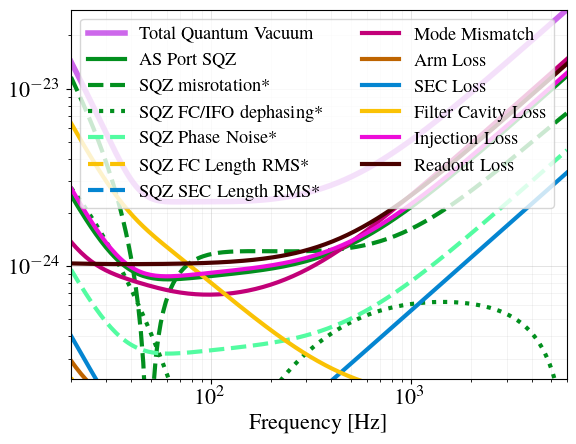

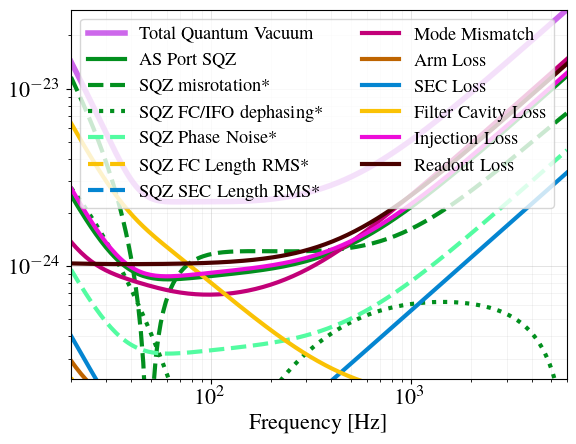

In [93]:
budget = gwinc.load_budget('L1_1022_FC7000.yaml')
freq = np.geomspace(20,6000,200)
trace = budget.run(freq=freq)
trace.Quantum.plot()

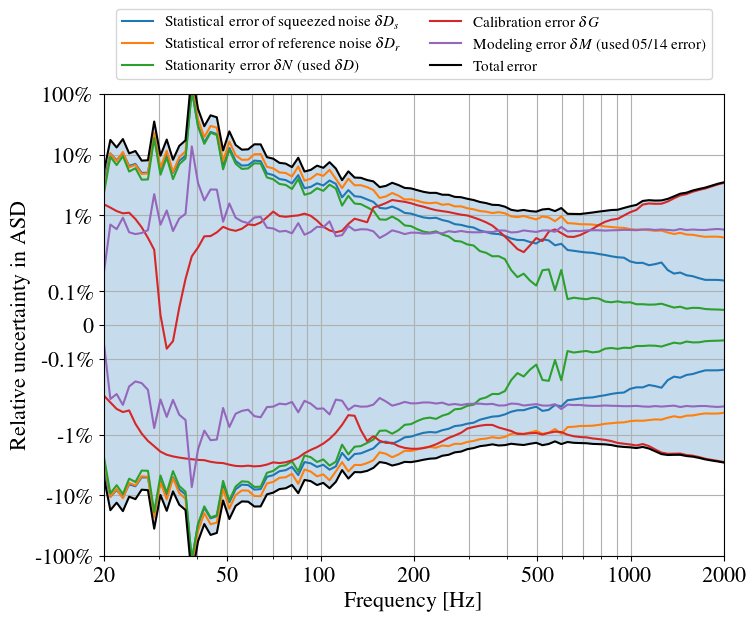

In [137]:
modelerrfile = './fig/FIS/MCMC/all/FitmmPsiOMC/deltaM.npy'
unsfile = './data/1022_Unsqz.h5'
fdsfile = './data/1022_FDS.h5'


D_r = lib.DARM(unsfile)
D_s = lib.DARM(fdsfile)

budget = gwinc.load_budget('./L1_1022_FC7000.yaml')
ifo = budget.ifo
ifo.Squeezer.Type = 'None'
trace = budget.run(freq=D_r.f, ifo=ifo)
M = lib.DARM()
M.f = D_r.f
M.S = trace.Quantum.psd

C = D_r - M

freq = Q.f
C.relerr_n = D_s.relerrN_n; C.relerr_p = D_s.relerrN_p
C.calcErr(); C.removeLines('DARM'); 
C.rebin_log(freq)

D_r.relerr_n = D_r.relerrD_n; D_r.relerr_p = D_r.relerrD_p
D_r.calcErr(); D_r.removeLines('DARM'); 
D_r.rebin_log(freq)

D_s.relerr_n = D_s.relerrD_n; D_s.relerr_p = D_s.relerrD_p
D_s.calcErr(); D_s.removeLines('DARM'); 
D_s.rebin_log(freq)

modelerrfile = './fig/FIS/MCMC/all/FitmmPsiOMC/deltaM.npy'
trace = budget.run(freq=Q.f, ifo=ifo)
M = lib.DARM()
M.f = Q.f
M.S = trace.Quantum.psd
M.relerr_n = relerrM_n; M.relerr_p = relerrM_p
M.calcErr(); 

fig, ax = plt.subplots()


colors = ['tab:blue',
         'tab:orange',
         'tab:green',
         'tab:red',
         'tab:purple',
         'tab:cyan']


zeros = Q.f*0

ax.plot(Q.f, abs(D_s.err_p)/(2*abs(Q.S)), c=colors[0], label=r'Statistical error of squeezed noise $\delta D_s$')
ax.plot(Q.f, abs(D_r.err_p)/(2*abs(Q.S)), c=colors[1], label=r'Statistical error of reference noise $\delta D_r$')
ax.plot(Q.f, abs(C.err_p)/(2*abs(Q.S)), c=colors[2], label=r'Stationarity error $\delta N$ (used $\delta D$)')
ax.plot(Q.f, np.interp(Q.f, D_s.f_lin, D_s.relerrG_p)/2, c=colors[3], label=r'Calibration error $\delta G$')
ax.plot(Q.f, M.err_p/(2*abs(Q.S)), c=colors[4], label='Modeling error $\delta M$ (used 05/14 error)')
ax.plot(Q.f, Q.err_p/(2*abs(Q.S)), c='black', label='Total error')





ax.plot(Q.f, -abs(D_s.err_n)/(2*abs(Q.S)), c=colors[0])
ax.plot(Q.f, -abs(D_r.err_n)/(2*abs(Q.S)), c=colors[1])
ax.plot(Q.f, -abs(C.err_n)/(2*abs(Q.S)), c=colors[2])
ax.plot(Q.f, -np.interp(Q.f, D_s.f_lin, D_s.relerrG_n)/2, c=colors[3])
ax.plot(Q.f, -M.err_n/(2*abs(Q.S)), c=colors[4])
ax.plot(Q.f, -Q.err_n/(2*abs(Q.S)), c='black')
ax.fill_between(Q.f, -Q.err_n/(2*abs(Q.S)), Q.err_p/(2*abs(Q.S)), where = -Q.err_n/(2*abs(Q.S))< Q.err_p/(2*abs(Q.S)), alpha = 0.25, interpolate=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=11)


# ax2.xlabel('Frequency [Hz]'); 
ax.set_ylabel('Relative uncertainty in ASD'); 
ax.set_xscale('log')
ax.set_yscale('symlog', linthresh=0.002)
# ax = ax2.gca()
# ax.yaxis.set_minor_formatter('{x:.1f}')
# ax.yaxis.set_major_formatter('{x:.1f}')
ax.grid(True, which='both')
# ax2.legend()
# ax2.title(titles[j])
ax.set_yticks([-1,-0.1,-0.01,-0.001,0.001,0,0.01,0.1,1], ['-100\%', '-10\%', '-1\%', '-0.1\%', '0.1\%', '0', '1\%', '10\%', '100\%'])
ax.set_xticks([20,50,100,200,500,1000,2000], ('20','50','100','200','500','1000','2000'))
ax.set_xlim(20, 2000); ax.set_ylim(-1, 1)



# plt.setp(ax2.get_xticklabels(), visible=False);
plt.xlabel('Frequency [Hz]')
fig.set_size_inches(8, 6)

# plt.savefig('./fig/errbudget.svg')
# plt.savefig('./fig/errbudget.pdf')
plt.show()

In [19]:
modelerrfile = './fig/FIS/MCMC/all/FitmmPsiOMC/deltaM.npy'
# unsfile = './data/0514_all_Unsqz_FCmis_LOonCLF.h5'
# fdsfile = './data/0514_22_FDS.h5'
# unsfile = './data/0515_5_Unsqz_FCmis_LOfinalized.h5'
# fdsfile = './data/0515_3_FDS.h5'
unsfile = './data/1022_Unsqz.h5'
fdsfile = './data/1022_FDS.h5'


D_r = lib.DARM(unsfile)
D_s = lib.DARM(fdsfile)


# M = np.load('./fig/FIS/MCMC/all/FitmmPsiOMC/S_med.npy')
# budget = gwinc.load_budget('Aplus')
# init(budget)
budgetyaml = './L1_1022_FC7000.yaml'
budget = gwinc.load_budget(budgetyaml)
ifo = budget.ifo
ifo.Squeezer.Type = 'None'
trace = budget.run(freq=D_r.f, ifo=ifo)
M = lib.DARM()
M.f = D_r.f
M.S = trace.Quantum.psd


# plt.loglog(D_r.f, np.sqrt(D_r.S))
# plt.loglog(D_s.f, np.sqrt(D_s.S))
# plt.loglog(D_r.f, np.sqrt(M))
# plt.xlim(20,2000)
# plt.ylim(2e-24, 2e-23)
# plt.show()

C = D_r - M
# C.S = abs(C.S)
Q = D_s - C



freq = np.geomspace(20,2000,500)

C.relerr_n = D_s.relerrN_n; C.relerr_p = D_s.relerrN_p
C.calcErr(); # C.removeLines('DARM'); 
C.rebin_log(freq)


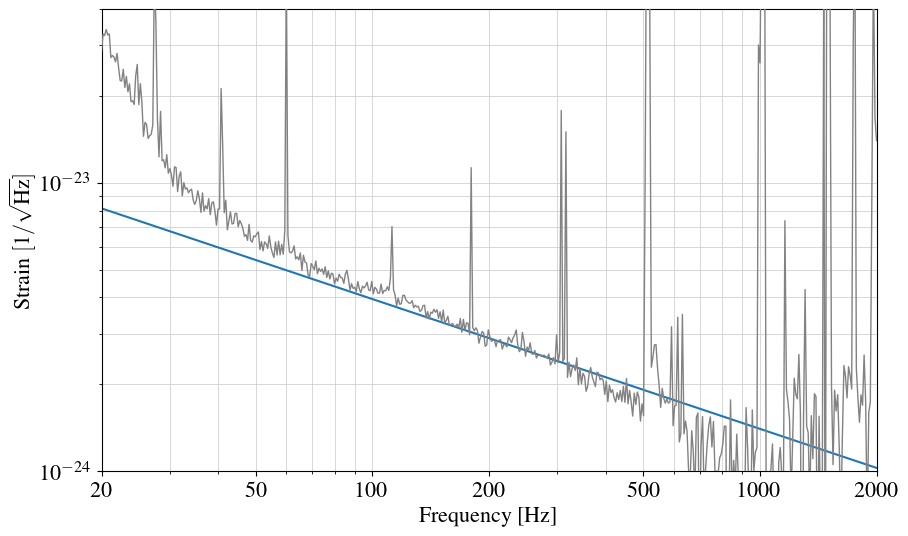

In [29]:
fontscale = 1.0
matplotlib.rc('font',**{'family':'serif','serif':['Times'], 'size':16*fontscale})
fig, ax = plt.subplots()



budget = gwinc.load_budget(budgetyaml)
trace = budget.run(freq=C.f)
S_fds = trace.Quantum.psd



# S_CTN = trace.CoatingBrownian.psd
# S_CTN = (1.2*1.306e-20*(100/C.f)**0.45/4000)**2
S_CTN = (1.58e-20*(100/C.f)**0.45/4000)**2



grayrgb = 130
ax.loglog(C.f, np.sqrt(abs(C.S)),c = [grayrgb/255,grayrgb/255,grayrgb/255], lw = 1,label='Inferred classical noise', zorder = 5)

ax.loglog(C.f, np.sqrt(S_CTN))

ax.set_xticks([20,50,100,200,500,1000,2000], ('20','50','100','200','500','1000','2000'))
ax.set_xlim(20, 2000); ax.set_ylim(1e-24, 4e-23)

grayrgb = 200
ax.grid(True, which='both', color=[grayrgb/255,grayrgb/255,grayrgb/255], linestyle='-', linewidth=0.5)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,3,4,2,7,0,5,6]
# legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], edgecolor="black", fontsize=11*fontscale)
# # legend = ax.legend(edgecolor="black", fontsize=10)
# legend.set_zorder(100)
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor('white')

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Strain $\mathrm{[1/\sqrt{Hz}]}$')
# ax.set_title(fdsfile)

fig.set_size_inches(10, 6)

# plt.savefig('./fig/moneyplot.svg')
# plt.savefig('./fig/moneyplot.pdf')
plt.show()

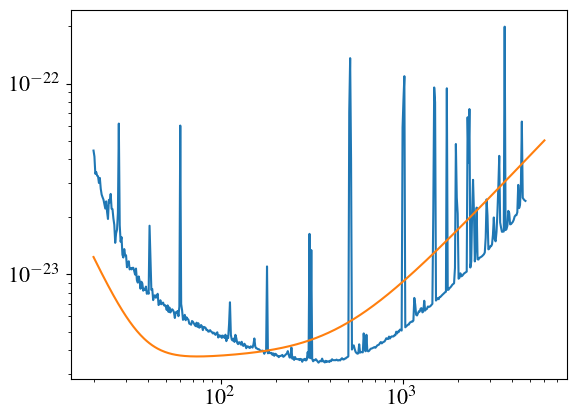

KeyError: '.h'

In [55]:
fdsfile = './data/1022_FDS.h5'

D_s = lib.DARM(fdsfile)

# freq = np.geomspace(10,6000,1000)

D_s.setZeroErr(); D_s.rebin_log(freq)


plt.loglog(D_s.f, np.sqrt(D_s.S))
plt.loglog(freq, np.sqrt(S_nosqz))


plt.show()

D_s.save('./data/1022_FDS_rebin.h')